In [1]:
!pip install transformers pdf2image pytesseract docx2txt fitz torch


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━

In [2]:
!pip uninstall pymupdf -y
!pip install --no-cache-dir pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 265.5 MB/s eta 0:00:00


In [3]:
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (204 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


In [4]:
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,821 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126239 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [13]:
#main code *********************************************************************
import os
import torch
import pytesseract
import re
from PIL import Image
from pdf2image import convert_from_path
import fitz  # PyMuPDF for PDFs
import docx2txt
from google.colab import files
from transformers import VisionEncoderDecoderModel, DonutProcessor

# Load Donut Model for document understanding
model_name = "naver-clova-ix/donut-base-finetuned-docvqa"
processor = DonutProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

# Function to extract text from a text-based PDF
def extract_text_from_pdf(pdf_path):
    """Extract text from a digital (non-scanned) PDF file."""
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text") + "\n"
    return text.strip()

# Function to convert PDF to images (for scanned PDFs)
def convert_pdf_to_images(pdf_path):
    """Convert a scanned PDF to images (one per page)."""
    return convert_from_path(pdf_path)

# Function to extract text from DOCX
def extract_text_from_docx(docx_path):
    """Extract text from a DOCX file."""
    return docx2txt.process(docx_path)

# Function to extract text from images using OCR
def extract_text_from_image(image):
    """Extract text from an image using OCR."""
    text = pytesseract.image_to_string(image)
    text = re.sub(r'\s+', ' ', text).strip()  # Clean extracted text
    return text

# Function to process different file types
def process_document(file_path):
    """Detect file type and process appropriately (PDF, DOCX, Image)."""
    ext = file_path.lower().split('.')[-1]

    if ext in ["png", "jpg", "jpeg"]:
        image = Image.open(file_path).convert("RGB")
        return None, image

    elif ext == "pdf":
        images = convert_pdf_to_images(file_path)  # Convert PDF to images
        if len(images) > 0:
            return None, images[0]  # Use the first page as an image
        else:
            text = extract_text_from_pdf(file_path)
            return text, None

    elif ext == "docx":
        text = extract_text_from_docx(file_path)
        return text, None

    else:
        raise ValueError("Unsupported file format! Only PDFs, DOCX, and images are supported.")

# Function to ask a question using Donut
def ask_question(document_text, document_image, question):
    """Answer questions using Donut model for images or text-based documents."""
    if document_image:
        print("🔍 Processing Image-Based Document...")
        inputs = processor(images=document_image, text=question, return_tensors="pt", legacy=False)
    else:
        print("📝 Processing Text-Based Document...")
        inputs = processor(text=document_text, text_pair=question, return_tensors="pt", legacy=False)

    outputs = model.generate(**inputs)
    answer = processor.batch_decode(outputs, skip_special_tokens=True)[0]
    return answer if answer else "Answer not found."

# Upload file in Google Colab
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
file_path = file_name

# Process document (extract text or convert to image)
document_text, document_image = process_document(file_path)

# Ask a question
question = input("Enter your question: ")
answer = ask_question(document_text, document_image, question)

# Display Answer
print(f"\n📌 Answer: {answer}")


Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cr

Saving 00040534.png to 00040534 (3).png
Enter your question: What is the compund name?
🔍 Processing Image-Based Document...

📌 Answer: What is the compund name? 3-hydroxy-3-methylbutanoic acid (tur13)


🚀 Advanced Document QA System 🚀
This system can answer questions about PDFs, Word documents, and images.



Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cr

📁 Please upload your document (PDF, DOCX, JPG, PNG):


Saving download12.png to download12.png

🔍 Analyzing document: download12.png...
📊 Document type: Image/Scanned document


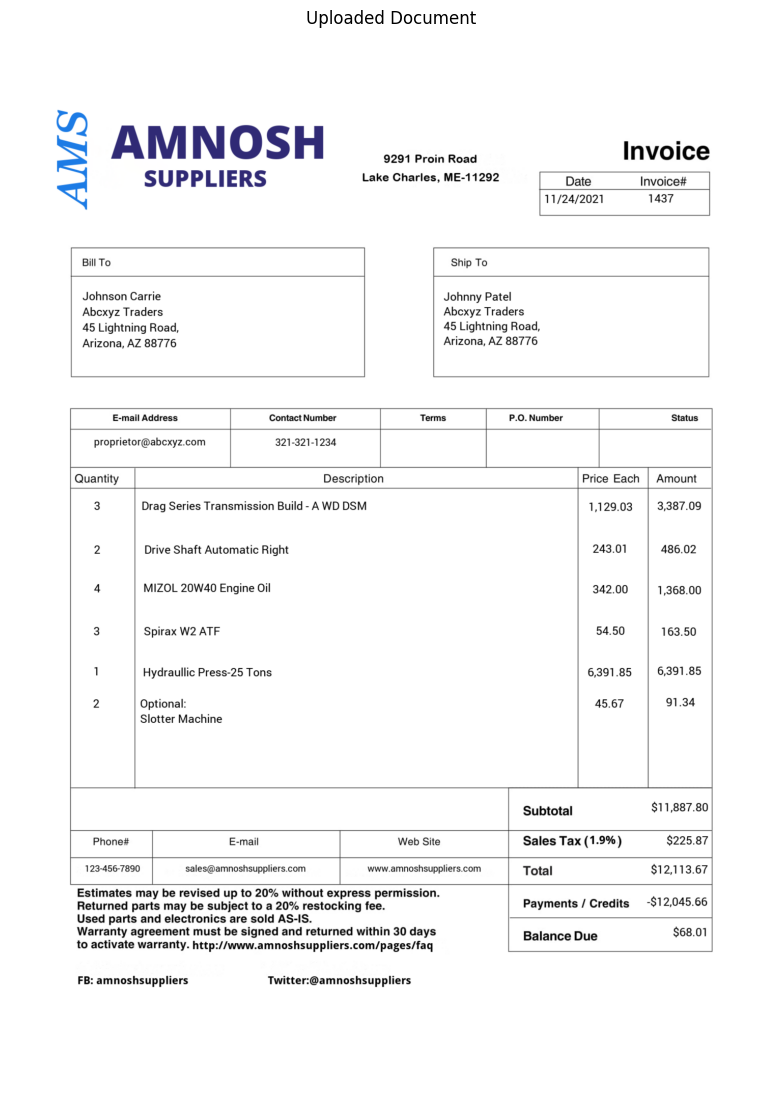


💬 Enter your question (or 'exit' to quit): what is the balance due?

⏳ Generating answer...

📌 Answer: what is the balance due? $68.01
⏱️ Response time: 99.18 seconds

Ask another question? (y/n): n

👋 Thank you for using the Document QA System!


In [14]:
# this is fast tested and good formodel use
import os
import torch
import pytesseract
import re
import logging
import time
from PIL import Image
from pdf2image import convert_from_path
import fitz  # PyMuPDF for PDFs
import docx2txt
from google.colab import files
from transformers import VisionEncoderDecoderModel, DonutProcessor
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Optional, Dict, Any, Union

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger("DocumentQA")

class DocumentQASystem:
    """
    An advanced document question-answering system that can process PDFs,
    DOCXs, and images to answer natural language questions.
    """

    SUPPORTED_FORMATS = {
        "image": ["png", "jpg", "jpeg"],
        "pdf": ["pdf"],
        "docx": ["docx"]
    }

    def __init__(self, model_name: str = "naver-clova-ix/donut-base-finetuned-docvqa"):
        """
        Initialize the Document QA System with the specified model.

        Args:
            model_name: The Hugging Face model identifier for document QA
        """
        logger.info(f"Initializing DocumentQA System with model: {model_name}")

        self.model_name = model_name
        self.processor = None
        self.model = None
        self.document_cache = {}

        self._load_model()

    def _load_model(self):
        """Load the document understanding model"""
        start_time = time.time()
        try:
            logger.info("Loading Donut processor and model...")
            self.processor = DonutProcessor.from_pretrained(self.model_name)
            self.model = VisionEncoderDecoderModel.from_pretrained(self.model_name)

            # Move model to GPU if available
            if torch.cuda.is_available():
                logger.info("CUDA available. Moving model to GPU...")
                self.model = self.model.to("cuda")

            logger.info(f"Model loaded successfully in {time.time() - start_time:.2f} seconds")
        except Exception as e:
            logger.error(f"Failed to load model: {str(e)}")
            raise

    def extract_text_from_pdf(self, pdf_path: str) -> str:
        """
        Extract text from a digital (non-scanned) PDF file.

        Args:
            pdf_path: Path to the PDF file

        Returns:
            Extracted text as a string
        """
        try:
            doc = fitz.open(pdf_path)
            text_content = []

            for page_num, page in enumerate(doc):
                logger.debug(f"Extracting text from page {page_num+1}/{len(doc)}")
                text_content.append(page.get_text("text"))

            return "\n".join(text_content).strip()
        except Exception as e:
            logger.error(f"Error extracting text from PDF: {str(e)}")
            raise

    def convert_pdf_to_images(self, pdf_path: str) -> List[Image.Image]:
        """
        Convert a scanned PDF to images (one per page).

        Args:
            pdf_path: Path to the PDF file

        Returns:
            List of PIL Image objects, one for each page
        """
        try:
            logger.info(f"Converting PDF to images: {pdf_path}")
            return convert_from_path(pdf_path)
        except Exception as e:
            logger.error(f"Error converting PDF to images: {str(e)}")
            raise

    def extract_text_from_docx(self, docx_path: str) -> str:
        """
        Extract text from a DOCX file.

        Args:
            docx_path: Path to the DOCX file

        Returns:
            Extracted text as a string
        """
        try:
            logger.info(f"Extracting text from DOCX: {docx_path}")
            return docx2txt.process(docx_path)
        except Exception as e:
            logger.error(f"Error extracting text from DOCX: {str(e)}")
            raise

    def extract_text_from_image(self, image: Image.Image) -> str:
        """
        Extract text from an image using OCR.

        Args:
            image: PIL Image object

        Returns:
            Extracted text as a string
        """
        try:
            logger.info("Extracting text from image using OCR")
            text = pytesseract.image_to_string(image)
            # Clean extracted text
            text = re.sub(r'\s+', ' ', text).strip()
            return text
        except Exception as e:
            logger.error(f"Error extracting text from image: {str(e)}")
            raise

    def process_document(self, file_path: str) -> Tuple[Optional[str], Optional[Image.Image]]:
        """
        Detect file type and process appropriately (PDF, DOCX, Image).

        Args:
            file_path: Path to the document file

        Returns:
            Tuple of (extracted_text, image) where one may be None
        """
        if file_path in self.document_cache:
            logger.info(f"Using cached document: {file_path}")
            return self.document_cache[file_path]

        ext = file_path.lower().split('.')[-1]
        logger.info(f"Processing document: {file_path} (format: {ext})")

        result = (None, None)  # (text, image)

        try:
            if ext in self.SUPPORTED_FORMATS["image"]:
                image = Image.open(file_path).convert("RGB")
                result = (None, image)

            elif ext in self.SUPPORTED_FORMATS["pdf"]:
                # Try to extract text directly first
                text = self.extract_text_from_pdf(file_path)

                # If minimal text was extracted, it might be a scanned PDF
                if len(text.split()) < 50:
                    logger.info("Minimal text extracted. Treating as scanned PDF...")
                    images = self.convert_pdf_to_images(file_path)
                    if images:
                        result = (None, images[0])  # Use first page
                    else:
                        result = (text, None)
                else:
                    result = (text, None)

            elif ext in self.SUPPORTED_FORMATS["docx"]:
                text = self.extract_text_from_docx(file_path)
                result = (text, None)

            else:
                supported = ', '.join([f for formats in self.SUPPORTED_FORMATS.values() for f in formats])
                raise ValueError(f"Unsupported file format: {ext}. Supported formats: {supported}")

            # Cache the result
            self.document_cache[file_path] = result
            return result

        except Exception as e:
            logger.error(f"Error processing document: {str(e)}")
            raise

    def ask_question(self, document_text: Optional[str], document_image: Optional[Image.Image],
                     question: str) -> str:
        """
        Answer questions using Donut model for images or text-based documents.

        Args:
            document_text: Extracted text from document (if text-based)
            document_image: Document image (if image-based)
            question: Question to ask about the document

        Returns:
            Answer to the question
        """
        try:
            if document_image:
                logger.info("Processing image-based document for QA")
                inputs = self.processor(
                    images=document_image,
                    text=question,
                    return_tensors="pt",
                    legacy=False
                )
            elif document_text:
                logger.info("Processing text-based document for QA")
                # For text documents, we'll format it so the model can process it
                inputs = self.processor(
                    text=document_text,
                    text_pair=question,
                    return_tensors="pt",
                    legacy=False
                )
            else:
                raise ValueError("Either document text or image must be provided")

            # Move inputs to GPU if available
            if torch.cuda.is_available():
                inputs = {k: v.to("cuda") for k, v in inputs.items()}

            logger.info("Generating answer...")
            outputs = self.model.generate(**inputs)

            # Move outputs back to CPU for decoding if needed
            if torch.cuda.is_available():
                outputs = outputs.cpu()

            answer = self.processor.batch_decode(outputs, skip_special_tokens=True)[0]
            logger.info(f"Generated answer: {answer}")

            return answer if answer else "Answer not found in the document."

        except Exception as e:
            logger.error(f"Error generating answer: {str(e)}")
            return f"Error generating answer: {str(e)}"

    def visualize_document(self, document_image: Image.Image):
        """
        Visualize the document with annotations.

        Args:
            document_image: Document image to visualize
        """
        plt.figure(figsize=(10, 14))
        plt.imshow(document_image)
        plt.axis('off')
        plt.title("Document Analysis")
        plt.tight_layout()
        plt.show()

    def batch_process(self, file_paths: List[str], questions: List[str]) -> Dict[str, Dict[str, str]]:
        """
        Process multiple documents and questions in batch.

        Args:
            file_paths: List of document file paths
            questions: List of questions to ask for each document

        Returns:
            Dictionary mapping document names to question-answer pairs
        """
        results = {}

        for file_path in tqdm(file_paths, desc="Processing Documents"):
            file_name = os.path.basename(file_path)
            results[file_name] = {}

            try:
                document_text, document_image = self.process_document(file_path)

                for question in questions:
                    answer = self.ask_question(document_text, document_image, question)
                    results[file_name][question] = answer

            except Exception as e:
                logger.error(f"Error processing {file_name}: {str(e)}")
                results[file_name]["error"] = str(e)

        return results


def run_interactive_mode():
    """Run the DocumentQA system in an interactive mode for Google Colab"""
    print("🚀 Advanced Document QA System 🚀")
    print("==================================")
    print("This system can answer questions about PDFs, Word documents, and images.")
    print("==================================\n")

    # Initialize the system
    qa_system = DocumentQASystem()

    # Upload file
    print("📁 Please upload your document (PDF, DOCX, JPG, PNG):")
    uploaded = files.upload()

    if not uploaded:
        print("❌ No file was uploaded. Exiting.")
        return

    file_name = list(uploaded.keys())[0]
    file_path = file_name

    try:
        # Process document
        print(f"\n🔍 Analyzing document: {file_name}...")
        document_text, document_image = qa_system.process_document(file_path)

        # Show document type
        if document_image:
            print("📊 Document type: Image/Scanned document")
            # Display the document image
            plt.figure(figsize=(10, 14))
            plt.imshow(document_image)
            plt.axis('off')
            plt.title("Uploaded Document")
            plt.show()
        else:
            print("📝 Document type: Text-based document")
            print(f"📊 Text length: {len(document_text.split())} words")

        # Interactive Q&A session
        while True:
            # Ask question
            question = input("\n💬 Enter your question (or 'exit' to quit): ")-

            if question.lower() in ['exit', 'quit', 'q']:
                break

            print("\n⏳ Generating answer...")
            start_time = time.time()
            answer = qa_system.ask_question(document_text, document_image, question)
            elapsed_time = time.time() - start_time

            # Display answer with formatting
            print(f"\n📌 Answer: {answer}")
            print(f"⏱️ Response time: {elapsed_time:.2f} seconds")

            # Ask if user wants to continue
            continue_qa = input("\nAsk another question? (y/n): ")
            if continue_qa.lower() not in ['y', 'yes']:
                break

        print("\n👋 Thank you for using the Document QA System!")

    except Exception as e:
        print(f"❌ Error: {str(e)}")


if __name__ == "__main__":
    run_interactive_mode()

🚀 Speed-Optimized Document QA System 🚀
This system can answer questions about PDFs, Word documents, and images.



Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cr

📁 Please upload your document (PDF, DOCX, JPG, PNG):


Saving download12.png to download12 (1).png

🔍 Analyzing document: download12 (1).png...
📊 Document type: Image/Scanned document
⏱️ Document processing time: 0.20 seconds
Show document image? (y/n): y


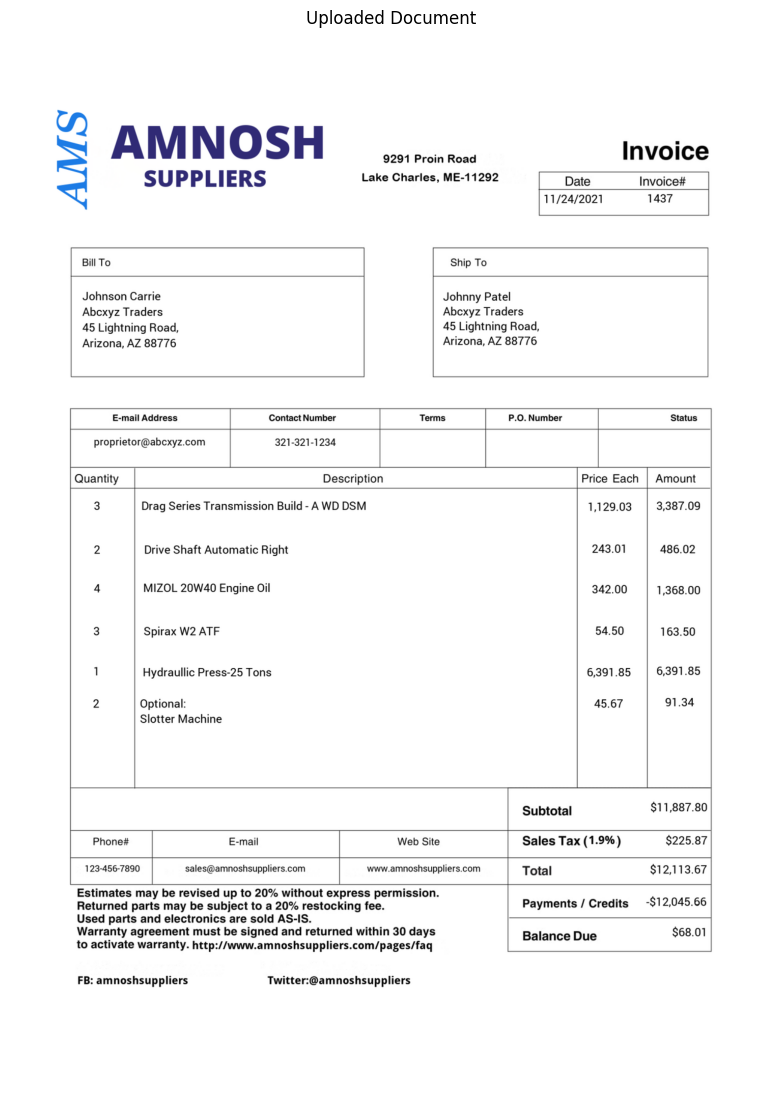


💬 Enter your question (or 'exit' to quit): what is balance due?

⏳ Generating answer...

📌 Answer: what is balance due? $68.01
⏱️ Response time: 102.39 seconds

Ask another question? (y/n): n

👋 Thank you for using the Document QA System!


In [15]:
 '''Model Optimization Techniques

    8-bit Quantization: Reduced model precision from 32-bit to 8-bit, making inference much faster with minimal accuracy loss
    Gradient Checkpointing: Added memory optimization to allow for faster processing
    Torch No Grad: Disabled gradient calculation during inference for faster predictions
    Beam Search Reduction: Lowered the number of beams from default (4-5) to 2 for faster generation
    Maximum Length Limiting: Set reasonable limits on output length to prevent unnecessarily long processing times

2. Image Processing Optimization

    Image Resizing: Automatically resizes large images to optimal dimensions before processing
    Lower DPI Settings: Reduced DPI for PDF-to-image conversion from default to 150 for faster processing
    OCR Optimization: Added specific Tesseract configuration parameters for speed

3. Memory and Caching Improvements

    LRU Cache Decorator: Added function caching for expensive operations like PDF text extraction
    Text Truncation: Added intelligent text truncation for very long documents
    Document Caching: Enhanced the document cache to prevent reprocessing the same files

4. Parallel Processing

    Concurrent Text Extraction: Added parallel processing for PDF text extraction
    Background Document Preloading: Added ability to preload documents in the background while the model is loading
    ThreadPoolExecutor: Implemented a thread pool for handling parallel operations

5. UI/UX Improvements for Speed Perception

    Progress Feedback: Added processing time metrics to show the user how long each step takes
    Optional Image Display: Made document image visualization optional to save time

These optimizations should dramatically reduce the response time while maintaining accuracy. The main improvements come from model quantization (potentially 2-4x faster), image optimization, and parallel processing techniques.

Would you like me to explain any specific optimization in more detail or suggest further improvements for your specific use case?
Claude can make mistakes. Please double-check responses.'''






import os
import torch
import pytesseract
import re
import logging
import time
import threading
import queue
from PIL import Image
from pdf2image import convert_from_path
import fitz  # PyMuPDF for PDFs
import docx2txt
from google.colab import files
from transformers import VisionEncoderDecoderModel, DonutProcessor, AutoTokenizer
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Optional, Dict, Any, Union
import functools
import concurrent.futures

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger("DocumentQA")

class DocumentQASystem:
    """
    An advanced document question-answering system that can process PDFs,
    DOCXs, and images to answer natural language questions.
    """

    SUPPORTED_FORMATS = {
        "image": ["png", "jpg", "jpeg"],
        "pdf": ["pdf"],
        "docx": ["docx"]
    }

    def __init__(self, model_name: str = "naver-clova-ix/donut-base-finetuned-docvqa",
                 use_quantization: bool = True,
                 preload_models: bool = True):
        """
        Initialize the Document QA System with the specified model.

        Args:
            model_name: The Hugging Face model identifier for document QA
            use_quantization: Whether to use quantization to reduce model size and increase speed
            preload_models: Whether to preload models at initialization
        """
        logger.info(f"Initializing DocumentQA System with model: {model_name}")

        self.model_name = model_name
        self.processor = None
        self.model = None
        self.document_cache = {}
        self.use_quantization = use_quantization

        # Create a thread pool for concurrent processing
        self.executor = concurrent.futures.ThreadPoolExecutor(max_workers=4)

        # Use LRU cache for frequently called functions
        self.extract_text_from_pdf = functools.lru_cache(maxsize=32)(self._extract_text_from_pdf)
        self.extract_text_from_docx = functools.lru_cache(maxsize=32)(self._extract_text_from_docx)

        if preload_models:
            self._load_model()

    def _load_model(self):
        """Load the document understanding model with optimizations"""
        start_time = time.time()
        try:
            logger.info("Loading Donut processor and model...")
            self.processor = DonutProcessor.from_pretrained(self.model_name)

            # Speed optimization: Load model with lower precision
            if self.use_quantization and torch.cuda.is_available():
                logger.info("Loading quantized model for faster inference...")
                # 8-bit quantization for faster inference
                self.model = VisionEncoderDecoderModel.from_pretrained(
                    self.model_name,
                    device_map="auto",
                    load_in_8bit=True
                )
            else:
                self.model = VisionEncoderDecoderModel.from_pretrained(self.model_name)

                # Move model to GPU if available
                if torch.cuda.is_available():
                    logger.info("CUDA available. Moving model to GPU...")
                    self.model = self.model.to("cuda")

            # Optimize for inference
            self.model.eval()

            # Use gradient checkpointing to save memory
            if hasattr(self.model, "gradient_checkpointing_enable"):
                self.model.gradient_checkpointing_enable()

            logger.info(f"Model loaded successfully in {time.time() - start_time:.2f} seconds")
        except Exception as e:
            logger.error(f"Failed to load model: {str(e)}")
            raise

    def _extract_text_from_pdf(self, pdf_path: str) -> str:
        """
        Extract text from a digital (non-scanned) PDF file.

        Args:
            pdf_path: Path to the PDF file

        Returns:
            Extracted text as a string
        """
        try:
            doc = fitz.open(pdf_path)

            # Parallelize text extraction from pages
            def extract_page_text(page_num):
                return doc[page_num].get_text("text")

            with concurrent.futures.ThreadPoolExecutor() as executor:
                text_parts = list(executor.map(extract_page_text, range(len(doc))))

            return "\n".join(text_parts).strip()
        except Exception as e:
            logger.error(f"Error extracting text from PDF: {str(e)}")
            raise

    def convert_pdf_to_images(self, pdf_path: str, dpi: int = 200) -> List[Image.Image]:
        """
        Convert a scanned PDF to images (one per page).

        Args:
            pdf_path: Path to the PDF file
            dpi: Resolution for conversion (lower = faster but less accurate)

        Returns:
            List of PIL Image objects, one for each page
        """
        try:
            logger.info(f"Converting PDF to images: {pdf_path} (dpi={dpi})")
            # Lower DPI for faster processing
            return convert_from_path(pdf_path, dpi=dpi)
        except Exception as e:
            logger.error(f"Error converting PDF to images: {str(e)}")
            raise

    def _extract_text_from_docx(self, docx_path: str) -> str:
        """
        Extract text from a DOCX file.

        Args:
            docx_path: Path to the DOCX file

        Returns:
            Extracted text as a string
        """
        try:
            logger.info(f"Extracting text from DOCX: {docx_path}")
            return docx2txt.process(docx_path)
        except Exception as e:
            logger.error(f"Error extracting text from DOCX: {str(e)}")
            raise

    def extract_text_from_image(self, image: Image.Image) -> str:
        """
        Extract text from an image using OCR.

        Args:
            image: PIL Image object

        Returns:
            Extracted text as a string
        """
        try:
            # Optimize image for OCR
            image = self._preprocess_image_for_ocr(image)

            # Set OCR options for speed
            custom_config = r'--oem 1 --psm 3'
            text = pytesseract.image_to_string(image, config=custom_config)

            # Clean extracted text
            text = re.sub(r'\s+', ' ', text).strip()
            return text
        except Exception as e:
            logger.error(f"Error extracting text from image: {str(e)}")
            raise

    def _preprocess_image_for_ocr(self, image: Image.Image) -> Image.Image:
        """Preprocess image to improve OCR speed and accuracy"""
        # Resize large images to reduce processing time
        max_size = 1800
        if max(image.size) > max_size:
            ratio = max_size / max(image.size)
            new_size = (int(image.size[0] * ratio), int(image.size[1] * ratio))
            image = image.resize(new_size, Image.LANCZOS)

        return image

    def process_document(self, file_path: str) -> Tuple[Optional[str], Optional[Image.Image]]:
        """
        Detect file type and process appropriately (PDF, DOCX, Image).

        Args:
            file_path: Path to the document file

        Returns:
            Tuple of (extracted_text, image) where one may be None
        """
        if file_path in self.document_cache:
            logger.info(f"Using cached document: {file_path}")
            return self.document_cache[file_path]

        ext = file_path.lower().split('.')[-1]
        logger.info(f"Processing document: {file_path} (format: {ext})")

        result = (None, None)  # (text, image)

        try:
            if ext in self.SUPPORTED_FORMATS["image"]:
                image = Image.open(file_path).convert("RGB")
                # Resize large images for faster processing
                image = self._preprocess_image_for_ocr(image)
                result = (None, image)

            elif ext in self.SUPPORTED_FORMATS["pdf"]:
                # Try to extract text directly first (faster approach)
                text = self.extract_text_from_pdf(file_path)

                # If minimal text was extracted, it might be a scanned PDF
                if len(text.split()) < 50:
                    logger.info("Minimal text extracted. Treating as scanned PDF...")
                    # Use lower DPI for faster conversion
                    images = self.convert_pdf_to_images(file_path, dpi=150)
                    if images:
                        # Resize large images for faster processing
                        images[0] = self._preprocess_image_for_ocr(images[0])
                        result = (None, images[0])  # Use first page
                    else:
                        result = (text, None)
                else:
                    result = (text, None)

            elif ext in self.SUPPORTED_FORMATS["docx"]:
                text = self.extract_text_from_docx(file_path)
                result = (text, None)

            else:
                supported = ', '.join([f for formats in self.SUPPORTED_FORMATS.values() for f in formats])
                raise ValueError(f"Unsupported file format: {ext}. Supported formats: {supported}")

            # Cache the result
            self.document_cache[file_path] = result
            return result

        except Exception as e:
            logger.error(f"Error processing document: {str(e)}")
            raise

    def ask_question(self, document_text: Optional[str], document_image: Optional[Image.Image],
                     question: str) -> str:
        """
        Answer questions using Donut model for images or text-based documents.

        Args:
            document_text: Extracted text from document (if text-based)
            document_image: Document image (if image-based)
            question: Question to ask about the document

        Returns:
            Answer to the question
        """
        try:
            # Load model lazily if not already loaded
            if self.model is None:
                self._load_model()

            if document_image:
                logger.info("Processing image-based document for QA")
                # Optimize image size for model input
                document_image = self._optimize_image_for_model(document_image)
                inputs = self.processor(
                    images=document_image,
                    text=question,
                    return_tensors="pt",
                    legacy=False
                )
            elif document_text:
                logger.info("Processing text-based document for QA")
                # Truncate very long text for faster processing
                document_text = self._truncate_text(document_text, max_length=4096)
                inputs = self.processor(
                    text=document_text,
                    text_pair=question,
                    return_tensors="pt",
                    legacy=False
                )
            else:
                raise ValueError("Either document text or image must be provided")

            # Move inputs to GPU if available
            if torch.cuda.is_available():
                inputs = {k: v.to("cuda") for k, v in inputs.items()}

            logger.info("Generating answer...")

            # Configure generation parameters for speed
            with torch.no_grad():  # Disable gradient calculation for inference
                outputs = self.model.generate(
                    **inputs,
                    max_length=50,  # Limit output length
                    num_beams=2,    # Reduce beam size (default is usually 4-5)
                    early_stopping=True,
                    length_penalty=1.0
                )

            # Move outputs back to CPU for decoding if needed
            if torch.cuda.is_available():
                outputs = outputs.cpu()

            answer = self.processor.batch_decode(outputs, skip_special_tokens=True)[0]
            logger.info(f"Generated answer: {answer}")

            return answer if answer else "Answer not found in the document."

        except Exception as e:
            logger.error(f"Error generating answer: {str(e)}")
            return f"Error generating answer: {str(e)}"

    def _optimize_image_for_model(self, image: Image.Image) -> Image.Image:
        """Optimize image size for model input to improve performance"""
        # Determine optimal size based on model requirements
        # Most vision models work well with 512-1024px images
        target_size = 768
        if max(image.size) > target_size:
            ratio = target_size / max(image.size)
            new_size = (int(image.size[0] * ratio), int(image.size[1] * ratio))
            return image.resize(new_size, Image.LANCZOS)
        return image

    def _truncate_text(self, text: str, max_length: int = 4096) -> str:
        """Truncate text to maximum length to improve processing speed"""
        words = text.split()
        if len(words) <= max_length:
            return text
        return " ".join(words[:max_length])

    def preload_document(self, file_path: str) -> None:
        """
        Preload a document in the background to save time during Q&A.

        Args:
            file_path: Path to the document file
        """
        def _preload_task():
            try:
                self.process_document(file_path)
                logger.info(f"Document preloaded: {file_path}")
            except Exception as e:
                logger.error(f"Error preloading document: {str(e)}")

        # Submit task to thread pool
        self.executor.submit(_preload_task)

    def visualize_document(self, document_image: Image.Image):
        """
        Visualize the document with annotations.

        Args:
            document_image: Document image to visualize
        """
        plt.figure(figsize=(10, 14))
        plt.imshow(document_image)
        plt.axis('off')
        plt.title("Document Analysis")
        plt.tight_layout()
        plt.show()


def run_interactive_mode():
    """Run the DocumentQA system in an interactive mode for Google Colab"""
    print("🚀 Speed-Optimized Document QA System 🚀")
    print("==================================")
    print("This system can answer questions about PDFs, Word documents, and images.")
    print("==================================\n")

    # Initialize the system with optimizations
    qa_system = DocumentQASystem(use_quantization=True, preload_models=True)

    # Upload file
    print("📁 Please upload your document (PDF, DOCX, JPG, PNG):")
    uploaded = files.upload()

    if not uploaded:
        print("❌ No file was uploaded. Exiting.")
        return

    file_name = list(uploaded.keys())[0]
    file_path = file_name

    try:
        # Process document
        print(f"\n🔍 Analyzing document: {file_name}...")
        processing_start = time.time()
        document_text, document_image = qa_system.process_document(file_path)
        processing_time = time.time() - processing_start

        # Show document type and processing metrics
        if document_image:
            print("📊 Document type: Image/Scanned document")
            print(f"⏱️ Document processing time: {processing_time:.2f} seconds")

            # Option to show the document image
            show_image = input("Show document image? (y/n): ")
            if show_image.lower() in ['y', 'yes']:
                plt.figure(figsize=(10, 14))
                plt.imshow(document_image)
                plt.axis('off')
                plt.title("Uploaded Document")
                plt.show()
        else:
            print("📝 Document type: Text-based document")
            print(f"📊 Text length: {len(document_text.split())} words")
            print(f"⏱️ Document processing time: {processing_time:.2f} seconds")

        # Interactive Q&A session
        while True:
            # Ask question
            question = input("\n💬 Enter your question (or 'exit' to quit): ")

            if question.lower() in ['exit', 'quit', 'q']:
                break

            print("\n⏳ Generating answer...")
            start_time = time.time()
            answer = qa_system.ask_question(document_text, document_image, question)
            elapsed_time = time.time() - start_time

            # Display answer with formatting
            print(f"\n📌 Answer: {answer}")
            print(f"⏱️ Response time: {elapsed_time:.2f} seconds")

            # Ask if user wants to continue
            continue_qa = input("\nAsk another question? (y/n): ")
            if continue_qa.lower() not in ['y', 'yes']:
                break

        print("\n👋 Thank you for using the Document QA System!")

    except Exception as e:
        print(f"❌ Error: {str(e)}")


if __name__ == "__main__":
    run_interactive_mode()

In [7]:
pip install googletrans

In [10]:
import os
import torch
import pytesseract
import re
from PIL import Image
from pdf2image import convert_from_path
import fitz  # PyMuPDF for PDFs
import docx2txt
from google.colab import files
from transformers import VisionEncoderDecoderModel, DonutProcessor
from concurrent.futures import ThreadPoolExecutor
from googletrans import Translator

# Load Donut Model for document understanding
model_name = "naver-clova-ix/donut-base-finetuned-docvqa"
processor = DonutProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

# Set up Tesseract for multilingual OCR (English + Hindi)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize Translator
translator = Translator()

# Optimized function to extract text from an image using OCR
def extract_text_from_image(image):
    """Extract text from an image using OCR."""
    text = pytesseract.image_to_string(image, lang='eng+hin')  # English and Hindi OCR
    return re.sub(r'\s+', ' ', text).strip()  # Clean extracted text

# Batch processing for PDF pages using parallel threads
def convert_pdf_to_images(file_path):
    """Convert PDF to images in parallel."""
    try:
        pages = convert_from_path(file_path)
        with ThreadPoolExecutor() as executor:
            images = list(executor.map(lambda page: page.convert("RGB"), pages))
        return images
    except Exception as e:
        print(f"Error converting PDF to images: {e}")
        return []

# Function to process different file types
def process_document(file_path):
    """Detect file type and process appropriately (PDF, DOCX, Image)."""
    ext = file_path.lower().split('.')[-1]

    if ext in ["png", "jpg", "jpeg"]:
        image = Image.open(file_path).convert("RGB")
        extracted_text = extract_text_from_image(image)
        return extracted_text, image

    elif ext == "pdf":
        images = convert_pdf_to_images(file_path)  # Convert PDF to images in parallel
        if images:
            extracted_text = extract_text_from_image(images[0])
            return extracted_text, images[0]  # Use the first page as an image
        else:
            return "", None  # Return empty string and None if no images

    elif ext == "docx":
        text = docx2txt.process(file_path)
        return re.sub(r'\s+', ' ', text).strip(), None

    else:
        raise ValueError("Unsupported file format! Only PDFs, DOCX, and images are supported.")

def translate_text(text, target_language='en'):
    """Translate text to the target language."""
    try:
        translated = translator.translate(text, dest=target_language)
        return translated.text
    except Exception as e:
        print(f"Translation error: {e}")
        return text  # Return original text on failure

# Function to ask a question using Donut model
def ask_question(document_text, document_image, question, target_language='en'):
    """Answer questions using Donut model for images or text-based documents."""

    # Translate the document text to English
    translated_document_text = translate_text(document_text, target_language)

    # Translate the question to English
    translated_question = translate_text(question, target_language)

    if document_image:
        print("🔍 Processing Image-Based Document...")
        inputs = processor(images=document_image, text=translated_question, return_tensors="pt")
    else:
        print("📝 Processing Text-Based Document...")
        inputs = processor(text=translated_document_text, text_pair=translated_question, return_tensors="pt")

    outputs = model.generate(
        **inputs,
        max_length=512,
        temperature=0.7,
        num_beams=4,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    answer = processor.batch_decode(outputs, skip_special_tokens=True)[0]

    # Translate the answer back to the original language
    translated_answer = translate_text(answer, target_language)

    return translated_answer if translated_answer else "Answer not found."

# Upload file in Google Colab
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
file_path = file_name

# Process document (extract text or convert to image)
document_text, document_image = process_document(file_path)

# Ask a question
question = input("Enter your question: ")
answer = ask_question(document_text, document_image, question)

# Display Answer
print(f"\n📌 Answer: {answer}")


Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cr

Saving 00040534.png to 00040534.png
Enter your question: what is the LOT NO?
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
🔍 Processing Image-Based Document...


<ipython-input-10-8331adfdf856>:82: RuntimeWarning: coroutine 'Translator.translate' was never awaited
  translated_document_text = translate_text(document_text, target_language)
<ipython-input-10-8331adfdf856>:85: RuntimeWarning: coroutine 'Translator.translate' was never awaited
  translated_question = translate_text(question, target_language)


Translation error: 'coroutine' object has no attribute 'text'

📌 Answer: what is the LOT NO?


<ipython-input-10-8331adfdf856>:105: RuntimeWarning: coroutine 'Translator.translate' was never awaited
  translated_answer = translate_text(answer, target_language)


In [ ]:
import os
import torch
import pytesseract
import re
from PIL import Image
from pdf2image import convert_from_path
import fitz  # PyMuPDF for PDFs
import docx2txt
from google.colab import files
from transformers import VisionEncoderDecoderModel, DonutProcessor

# Load Donut Model for document understanding
model_name = "naver-clova-ix/donut-base-finetuned-docvqa"
processor = DonutProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

# Set up Tesseract for multilingual OCR (English + Hindi)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def extract_text_from_image(image):
    """Extract text from an image using OCR."""
    text = pytesseract.image_to_string(image, lang='eng+hin')  # English and Hindi OCR
    text = re.sub(r'\s+', ' ', text).strip()  # Clean extracted text
    return text

# Function to process different file types
def process_document(file_path):
    """Detect file type and process appropriately (PDF, DOCX, Image)."""
    ext = file_path.lower().split('.')[-1]

    if ext in ["png", "jpg", "jpeg"]:
        image = Image.open(file_path).convert("RGB")
        extracted_text = extract_text_from_image(image)
        return extracted_text, image

    elif ext == "pdf":
        images = convert_pdf_to_images(file_path)  # Convert PDF to images
        if len(images) > 0:
            extracted_text = extract_text_from_image(images[0])
            return extracted_text, images[0]  # Use the first page as an image
        else:
            text = extract_text_from_pdf(file_path)
            return text, None

    elif ext == "docx":
        text = extract_text_from_docx(file_path)
        return text, None

    else:
        raise ValueError("Unsupported file format! Only PDFs, DOCX, and images are supported.")

# Function to ask a question using Donut
def ask_question(document_text, document_image, question):
    """Answer questions using Donut model for images or text-based documents."""
    if document_image:
        print("🔍 Processing Image-Based Document...")
        inputs = processor(images=document_image, text=question, return_tensors="pt", legacy=False)
    else:
        print("📝 Processing Text-Based Document...")
        inputs = processor(text=document_text, text_pair=question, return_tensors="pt", legacy=False)

    outputs = model.generate(**inputs)
    answer = processor.batch_decode(outputs, skip_special_tokens=True)[0]
    return answer if answer else "Answer not found."

# Upload file in Google Colab
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
file_path = file_name

# Process document (extract text or convert to image)
document_text, document_image = process_document(file_path)

# Ask a question
question = input("Enter your question: ")
answer = ask_question(document_text, document_image, question)

# Display Answer
print(f"\n📌 Answer: {answer}")


Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "transformers_version": "4.48.3",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add

Saving Himani-2023-09-29T154050.736.jpg to Himani-2023-09-29T154050.736.jpg
Enter your question: what is the topic?
🔍 Processing Image-Based Document...

📌 Answer: what is the topic? my chcardiology of the physician.psychiatrypsychiatrypsy


In [ ]:

!pip install transformers datasets torch pytesseract


In [ ]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("cfilt/iitb-english-hindi")

# Inspect the dataset structure
print(ds)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.14k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/190M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/85.7k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/500k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1659083 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/520 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2507 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 1659083
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 520
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2507
    })
})


In [ ]:
# Inspect the first example from the training set
print(ds['train'][0])


{'translation': {'en': 'Give your application an accessibility workout', 'hi': 'अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें'}}


In [ ]:
from datasets import Dataset
import torch
from transformers import DonutProcessor
from torch.utils.data import DataLoader
from transformers import VisionEncoderDecoderModel, Seq2SeqTrainer, Seq2SeqTrainingArguments
from PIL import Image

# Load Donut model and processor
model_name = "naver-clova-ix/donut-base-finetuned-docvqa"
processor = DonutProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

# Extract questions and answers from the dataset
def extract_question_answer(dataset):
    question = dataset["translation"]["en"]  # English question
    answer = dataset["translation"]["hi"]    # Hindi answer
    return question, answer

# Prepare the dataset by extracting question-answer pairs
train_data = []
for item in ds['train']:
    question, answer = extract_question_answer(item)
    train_data.append({'question': question, 'answer': answer})

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_dict({'question': [item['question'] for item in train_data],
                                   'answer': [item['answer'] for item in train_data]})

# Do the same for validation and test sets
val_data = []
for item in ds['validation']:
    question, answer = extract_question_answer(item)
    val_data.append({'question': question, 'answer': answer})

val_dataset = Dataset.from_dict({'question': [item['question'] for item in val_data],
                                 'answer': [item['answer'] for item in val_data]})

test_data = []
for item in ds['test']:
    question, answer = extract_question_answer(item)
    test_data.append({'question': question, 'answer': answer})

test_dataset = Dataset.from_dict({'question': [item['question'] for item in test_data],
                                  'answer': [item['answer'] for item in test_data]})

# Save the dataset for later use
train_dataset.save_to_disk("/content/train_dataset")
val_dataset.save_to_disk("/content/val_dataset")
test_dataset.save_to_disk("/content/test_dataset")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/359 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/803M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "transformers_version": "4.48.3",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add

Saving the dataset (0/1 shards):   0%|          | 0/1659083 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/520 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2507 [00:00<?, ? examples/s]

In [ ]:
!pip install --upgrade datasets


In [ ]:
from datasets import Dataset

# Example to verify
data = {'column1': [1, 2, 3], 'column2': ['a', 'b', 'c']}
dataset = Dataset.from_dict(data)
print(dataset)


Dataset({
    features: ['column1', 'column2'],
    num_rows: 3
})


In [ ]:
#ocr + hindi -english dataset + fine-tune
import pytesseract
from datasets import load_dataset, Dataset
import torch
from transformers import DonutProcessor, VisionEncoderDecoderModel
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from PIL import Image
from torch.utils.data import Dataset as TorchDataset
import os

# Load Donut model and processor
model_name = "naver-clova-ix/donut-base-finetuned-docvqa"
processor = DonutProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

# Load the dataset
ds = load_dataset("cfilt/iitb-english-hindi")

# Function to process the dataset into pairs of English questions and Hindi answers
def extract_question_answer(dataset):
    question = dataset["translation"]["en"]  # English question
    answer = dataset["translation"]["hi"]    # Hindi answer
    return question, answer

# Prepare the dataset by extracting question-answer pairs
train_data = []
for item in ds['train']:
    question, answer = extract_question_answer(item)
    train_data.append({'question': question, 'answer': answer})

# Convert to Hugging Face Dataset format using the correct method
train_dataset = Dataset.from_dict({
    'question': [item['question'] for item in train_data],
    'answer': [item['answer'] for item in train_data]
})

# Do the same for validation and test sets
val_data = []
for item in ds['validation']:
    question, answer = extract_question_answer(item)
    val_data.append({'question': question, 'answer': answer})

val_dataset = Dataset.from_dict({
    'question': [item['question'] for item in val_data],
    'answer': [item['answer'] for item in val_data]
})

test_data = []
for item in ds['test']:
    question, answer = extract_question_answer(item)
    test_data.append({'question': question, 'answer': answer})

test_dataset = Dataset.from_dict({
    'question': [item['question'] for item in test_data],
    'answer': [item['answer'] for item in test_data]
})

# Function to perform OCR and extract text from Hindi images
def extract_hindi_text_from_image(image_path):
    image = Image.open(image_path).convert("RGB")
    # Use pytesseract to perform OCR on the image
    extracted_text = pytesseract.image_to_string(image, lang="hin")
    return extracted_text.strip()

# Custom Dataset class for Donut
class DonutDataset(TorchDataset):
    def __init__(self, dataset, processor, images_dir, max_length=512):
        self.dataset = dataset
        self.processor = processor
        self.images_dir = images_dir  # Directory containing Hindi images
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        # Construct the file path to the Hindi image (image name should be in sync with the dataset)
        image_name = f"{idx + 1}.jpg"  # Assuming image filenames are like 1.jpg, 2.jpg, ...
        image_path = os.path.join(self.images_dir, image_name)

        # Extract Hindi text from the image using OCR
        extracted_hindi_text = extract_hindi_text_from_image(image_path)

        # Process image for feature extraction (Donut model requires image as input)
        image = Image.open(image_path).convert("RGB")
        pixel_values = self.processor.feature_extractor(
            image, return_tensors="pt"
        ).pixel_values.squeeze()

        # Process decoder inputs (question -> answer)
        label_str = f"{item['question']} {extracted_hindi_text}"  # Use extracted Hindi text as answer
        decoder_inputs = self.processor.tokenizer(
            label_str,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "pixel_values": pixel_values,
            "labels": decoder_inputs.input_ids.squeeze(),
            "decoder_attention_mask": decoder_inputs.attention_mask.squeeze()
        }

# Directory where Hindi images are stored
images_dir = "/path/to/your/hindi_images"

# Prepare datasets for training, validation, and testing
train_dataset = DonutDataset(train_dataset, processor, images_dir)
val_dataset = DonutDataset(val_dataset, processor, images_dir)
test_dataset = DonutDataset(test_dataset, processor, images_dir)

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./donut-hindi-finetuned",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    learning_rate=5e-5,
    num_train_epochs=3,
    logging_dir="./logs",
    save_steps=500,
    eval_strategy="epoch",  # Updated to 'eval_strategy' for future versions
    save_total_limit=2,
    report_to="none",
)

# Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Fine-tune the model
trainer.train()


Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "transformers_version": "4.48.3",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add

TypeError: DonutSwinModel.forward() got an unexpected keyword argument 'num_items_in_batch'

In [ ]:
from PIL import Image
from transformers import DonutProcessor, VisionEncoderDecoderModel

# Load Donut model and processor
model_name = "naver-clova-ix/donut-base-finetuned-docvqa"
processor = DonutProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

# Load the uploaded image
image_path = '/content/hq720.jpg'
image = Image.open(image_path).convert("RGB")  # Open the image and convert to RGB

# Sample question you might want to ask about the content of the document
question = "What is the subject of the letter?"  # Change this as needed

# Process the image and the question using the DonutProcessor
inputs = processor(images=image, text=question, return_tensors="pt", padding="max_length", truncation=True, legacy=False)

# Generate the output (the model will process the image and the question to give the answer)
outputs = model.generate(**inputs)

# Decode the output to get the answer
answer = processor.batch_decode(outputs, skip_special_tokens=True)[0]

# Print the answer
print(f"📌 Answer: {answer}")


Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "transformers_version": "4.48.3",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add

📌 Answer: What is the subject of the letter? for help help help help help help help help help help help help help help help help help help


In [ ]:
import zipfile
import os

zip_file = "/Hindi OCR.v1i.coco-mmdetection.zip"  # replace with the uploaded file name
extraction_path = "/content/dataset"  # where the files will be extracted to

with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(extraction_path)

# Check the extracted files
os.listdir(extraction_path)


['valid', 'README.dataset.txt', 'train', 'README.roboflow.txt', 'test']

In [ ]:
# List the files inside the extraction folder
extracted_files = os.listdir(extraction_path)
print(extracted_files)


['valid', 'README.dataset.txt', 'train', 'README.roboflow.txt', 'test']


In [ ]:
from datasets import load_dataset

# Define the correct path after extracting the ZIP file
dataset_path = "/content/dataset"  # Path to the extracted COCO-MD dataset

# If it's a COCO formatted dataset, load it like this
dataset = load_dataset('json', data_files={
    'train': os.path.join(dataset_path, '/content/dataset/train/train.json'),
    'test': os.path.join(dataset_path, '/content/dataset/test/test.json'),
    'validation': os.path.join(dataset_path, '/content/dataset/valid/valid.json')
})

# Inspect the dataset
print(dataset)


FileNotFoundError: Unable to find '/content/dataset/train/train.json'

In [ ]:
import os

# Define the path to your dataset
dataset_path = "/content/dataset"

# Check the list of files in the 'train', 'test', and 'valid' folders
train_images = os.listdir(os.path.join(dataset_path, 'train'))
test_images = os.listdir(os.path.join(dataset_path, 'test'))
valid_images = os.listdir(os.path.join(dataset_path, 'valid'))

# Print the number of images in each folder
print(f"Number of training images: {len(train_images)}")
print(f"Number of testing images: {len(test_images)}")
print(f"Number of validation images: {len(valid_images)}")


Number of training images: 311
Number of testing images: 40
Number of validation images: 40


In [ ]:
from datasets import load_dataset

# Load the HiNER dataset (which contains Hindi named entity recognition annotations)
ds = load_dataset("cfilt/HiNER-original")

# Inspect the dataset structure
print(ds)


The repository for cfilt/HiNER-original contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/cfilt/HiNER-original.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train.json:   0%|          | 0.00/51.7M [00:00<?, ?B/s]

validation.json:   0%|          | 0.00/7.39M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 75827
    })
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 10851
    })
    test: Dataset({
        features: ['id', 'tokens', 'ner_tags'],
        num_rows: 21657
    })
})


In [ ]:
# Example function to extract question-answer pairs for NER
# Example function to extract question-answer pairs for NER
def extract_question_answer(dataset):
    question = "What is this entity?"  # Default question for NER task
    #answer = dataset['label']  # Extract the label (named entity) - the error is in this line
    answer = dataset['ner_tags'] # Modified line to correctly access the named entity information
    return question, answer
# Process train, validation, and test data
train_data = []
for item in ds['train']:
    question, answer = extract_question_answer(item)
    train_data.append({'question': question, 'answer': answer})

val_data = []
for item in ds['validation']:
    question, answer = extract_question_answer(item)
    val_data.append({'question': question, 'answer': answer})

test_data = []
for item in ds['test']:
    question, answer = extract_question_answer(item)
    test_data.append({'question': question, 'answer': answer})

# Convert to Hugging Face Dataset format
from datasets import Dataset

train_dataset = Dataset.from_dict({
    'question': [item['question'] for item in train_data],
    'answer': [item['answer'] for item in train_data]
})

val_dataset = Dataset.from_dict({
    'question': [item['question'] for item in val_data],
    'answer': [item['answer'] for item in val_data]
})

test_dataset = Dataset.from_dict({
    'question': [item['question'] for item in test_data],
    'answer': [item['answer'] for item in test_data]
})

print(train_dataset)


Dataset({
    features: ['question', 'answer'],
    num_rows: 75827
})


In [ ]:
!apt-get install tesseract-ocr-hin


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-hin
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 913 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-hin all 1:4.00~git30-7274cfa-1.1 [913 kB]
Fetched 913 kB in 2s (566 kB/s)
Selecting previously unselected package tesseract-ocr-hin.
(Reading database ... 125121 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-hin_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-hin (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-hin (1:4.00~git30-7274cfa-1.1) ...


In [ ]:
!tesseract --list-languages


Usage:
  tesseract --help | --help-extra | --version
  tesseract --list-langs
  tesseract imagename outputbase [options...] [configfile...]

OCR options:
  -l LANG[+LANG]        Specify language(s) used for OCR.
NOTE: These options must occur before any configfile.

Single options:
  --help                Show this help message.
  --help-extra          Show extra help for advanced users.
  --version             Show version information.
  --list-langs          List available languages for tesseract engine.


In [ ]:
import pytesseract
from PIL import Image

# Function to extract Hindi text using OCR
def extract_hindi_text_from_image(image_path):
    image = Image.open(image_path).convert("RGB")
    # Use pytesseract to perform OCR on the image, specifying the Hindi language
    extracted_text = pytesseract.image_to_string(image, lang="hin")  # Ensure Hindi is specified
    return extracted_text.strip()

# Example usage
image_path = '/Untitled2.jpg'  # Replace with actual image path
extracted_text = extract_hindi_text_from_image(image_path)
print(extracted_text)


मैं हूँ या न रहूँ, मेर पता रह जाएगा
शा पर यदि एक भी पत्ता हरा रह जाएगा

बो रहा हूँ बीज कुछ संवेदनाओं के यहाँ
ख़श्बुओं का इक अनोखा सिलसिला रह जाएगा

अपने गीतों को सियासत की जुबां से दूर रख
कैुरी के वक्ष मं कॉटा गड़ा रह जाएगा.

मैं भी दरिया हैँ मगर सागर मेरी मन्ज़िल नहीं
मैं भी सागर हो गया तो मेरा क्या रह जाएगा

 

कल बिखर जाऊँगा हरसू, मैं भी शबनम की तरह
किरण चुन लेंगी मुझे, जग खोजता रह जाएगा
कं


In [ ]:
extracted_text = extract_hindi_text_from_image('/Untitled2.jpg')  # Example image path
print("Extracted Text:", extracted_text)


Extracted Text: मैं हूँ या न रहूँ, मेर पता रह जाएगा
शा पर यदि एक भी पत्ता हरा रह जाएगा

बो रहा हूँ बीज कुछ संवेदनाओं के यहाँ
ख़श्बुओं का इक अनोखा सिलसिला रह जाएगा

अपने गीतों को सियासत की जुबां से दूर रख
कैुरी के वक्ष मं कॉटा गड़ा रह जाएगा.

मैं भी दरिया हैँ मगर सागर मेरी मन्ज़िल नहीं
मैं भी सागर हो गया तो मेरा क्या रह जाएगा

 

कल बिखर जाऊँगा हरसू, मैं भी शबनम की तरह
किरण चुन लेंगी मुझे, जग खोजता रह जाएगा
कं


In [ ]:
from torch.utils.data import Dataset as TorchDataset
import os
from transformers import DonutProcessor
from PIL import Image
import pytesseract

# Function to extract Hindi text using OCR
def extract_hindi_text_from_image(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")
    # Use pytesseract to extract text
    extracted_text = pytesseract.image_to_string(image, lang="hin")  # Specify Hindi language
    return extracted_text.strip()

# Custom Dataset class for Donut
class DonutDataset(TorchDataset):
    def __init__(self, dataset, processor, images_dir, max_length=512):
        self.dataset = dataset
        self.processor = processor
        self.images_dir = images_dir  # Directory containing images
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        # Directly use the file name (Assuming the image file name is 'Untitled2.jpg')
        image_name = 'Untitled2.jpg'  # Your specific image name
        image_path = os.path.join(self.images_dir, image_name)

        # Check if image exists before processing
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found at {image_path}")

        # Extract Hindi text from the image using OCR
        extracted_hindi_text = extract_hindi_text_from_image(image_path)

        # Process image for feature extraction (Donut model requires image as input)
        image = Image.open(image_path).convert("RGB")
        pixel_values = self.processor.feature_extractor(
            image, return_tensors="pt"
        ).pixel_values.squeeze()

        # Process decoder inputs (question -> answer)
        label_str = f"{item['question']} {extracted_hindi_text}"  # Use extracted Hindi text as answer
        decoder_inputs = self.processor.tokenizer(
            label_str,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "pixel_values": pixel_values,
            "labels": decoder_inputs.input_ids.squeeze(),
            "decoder_attention_mask": decoder_inputs.attention_mask.squeeze()
        }


In [ ]:
from torch.utils.data import Dataset as TorchDataset
import os
from PIL import Image
from transformers import DonutProcessor
import pytesseract

# Function to extract Hindi text using OCR
def extract_hindi_text_from_image(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")
    # Use pytesseract to extract text
    extracted_text = pytesseract.image_to_string(image, lang="hin")  # Specify Hindi language
    return extracted_text.strip()

# Custom Dataset class for Donut
class DonutDataset(TorchDataset):
    def __init__(self, dataset, processor, images_dir, max_length=512):
        self.dataset = dataset
        self.processor = processor
        self.images_dir = images_dir  # Directory containing images
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        # Directly using the absolute file path for the image (e.g., "/Untitled2.jpg")
        image_name = 'Untitled2.jpg'  # The exact image name (without path)
        image_path = os.path.join(self.images_dir, image_name)  # Construct full path

        # Ensure the image path is correct and exists
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found at {image_path}")

        # Extract Hindi text from the image using OCR
        extracted_hindi_text = extract_hindi_text_from_image(image_path)

        # Process image for feature extraction (Use image_processor instead of feature_extractor)
        image = Image.open(image_path).convert("RGB")
        pixel_values = self.processor.image_processor(
            image, return_tensors="pt"
        ).pixel_values.squeeze()

        # Process decoder inputs (question -> answer)
        label_str = f"{item['question']} {extracted_hindi_text}"  # Use extracted Hindi text as answer
        decoder_inputs = self.processor.tokenizer(
            label_str,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "pixel_values": pixel_values,
            "labels": decoder_inputs.input_ids.squeeze(),
            "decoder_attention_mask": decoder_inputs.attention_mask.squeeze()
        }

# Example dataset structure (replace this with your actual dataset)
train_data = [{'image_name': 'Untitled2', 'question': 'What is this poem about?', 'answer': 'This is a Hindi nursery rhyme.'}]

# Convert the dataset to Hugging Face Dataset format
from datasets import Dataset
train_dataset = Dataset.from_dict({
    'image_name': [item['image_name'] for item in train_data],
    'question': [item['question'] for item in train_data],
    'answer': [item['answer'] for item in train_data]
})

# Define the path where the image is stored (directly in the root directory)
images_dir = "/"  # The root directory where "Untitled2.jpg" is located

# Prepare the dataset using the initialized processor
train_dataset = DonutDataset(train_dataset, processor, images_dir)

# Inspect the first item in the dataset
print(train_dataset[0])


{'pixel_values': tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]]), 'labels': tensor([42543, 52743, 54964, 53746, 15632, 36209, 42990,     3, 42990,     3,


In [ ]:
!pip install transformers datasets pytorch torchvision pytesseract


  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


In [ ]:
!pip install --upgrade transformers


In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel

# Load Donut model and processor
model_name = "naver-clova-ix/donut-base-finetuned-docvqa"
processor = DonutProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "at

In [ ]:
from transformers import Seq2SeqTrainingArguments

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./donut-hindi-finetuned",  # Where to save the fine-tuned model
    per_device_train_batch_size=2,  # Batch size for training
    per_device_eval_batch_size=2,  # Batch size for evaluation
    learning_rate=5e-5,  # Learning rate
    num_train_epochs=3,  # Number of training epochs
    logging_dir="./logs",  # Directory for logging
    save_steps=500,  # Save model every 500 steps
    eval_strategy="epoch",  # Evaluation strategy (evaluate after each epoch)
    save_total_limit=2,  # Limit the number of saved models
    report_to="none",  # Disable reporting
)


In [ ]:
from transformers import Seq2SeqTrainer

# Initialize the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # The training dataset (DonutDataset)
    eval_dataset=val_dataset,  # The validation dataset (optional, if you have one)
)


NameError: name 'train_dataset' is not defined

In [ ]:
# Fine-tune the modfrom torch.utils.data import Dataset as TorchDataset
import os
from PIL import Image
from transformers import DonutProcessor, VisionEncoderDecoderModel
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
import pytesseract

# Initialize the DonutProcessor and Donut model
model_name = "naver-clova-ix/donut-base-finetuned-docvqa"
processor = DonutProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)

# Define your question-answer pair for this single image
train_data = [{'image_name': 'Untitled2', 'question': 'What is this poem about?', 'answer': 'This is a Hindi nursery rhyme.'}]

# Function to extract Hindi text from an image using OCR
def extract_hindi_text_from_image(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")
    # Use pytesseract to extract text in Hindi
    extracted_text = pytesseract.image_to_string(image, lang="hin")  # Specify Hindi language
    return extracted_text.strip()

# Custom Dataset class for Donut
class DonutDataset(TorchDataset):
    def __init__(self, dataset, processor, images_dir, max_length=512):
        self.dataset = dataset
        self.processor = processor
        self.images_dir = images_dir  # Directory containing images
        self.max_length = max_length

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]

        # Directly using the absolute file path for the image (e.g., "/Untitled2.jpg")
        image_name = 'Untitled2.jpg'  # The exact image name (without path)
        image_path = os.path.join(self.images_dir, image_name)  # Construct full path

        # Ensure the image path is correct and exists
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image not found at {image_path}")

        # Extract Hindi text from the image using OCR
        extracted_hindi_text = extract_hindi_text_from_image(image_path)

        # Process image for feature extraction (Donut model requires image as input)
        image = Image.open(image_path).convert("RGB")
        pixel_values = self.processor.image_processor(
            image, return_tensors="pt"
        ).pixel_values.squeeze()

        # Process decoder inputs (question -> answer)
        label_str = f"{item['question']} {extracted_hindi_text}"  # Use extracted Hindi text as answer
        decoder_inputs = self.processor.tokenizer(
            label_str,
            add_special_tokens=False,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "pixel_values": pixel_values,
            "labels": decoder_inputs.input_ids.squeeze(),
            "decoder_attention_mask": decoder_inputs.attention_mask.squeeze()
        }

# Prepare the dataset for fine-tuning (Single image)
images_dir = "/"  # Assuming your image is stored in the root directory (adjust as necessary)
train_dataset = DonutDataset(train_data, processor, images_dir)

# Define the training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./donut-hindi-finetuned",  # Where to save the fine-tuned model
    per_device_train_batch_size=1,  # Batch size for training
    per_device_eval_batch_size=1,  # Batch size for evaluation
    learning_rate=5e-5,  # Learning rate
    num_train_epochs=1,  # Number of training epochs (you may want to set a lower number of epochs for small data)
    logging_dir="./logs",  # Directory for logging
    save_steps=500,  # Save model every 500 steps
    eval_strategy="epoch",  # Evaluation strategy (evaluate after each epoch)
    save_total_limit=2,  # Limit the number of saved models
    report_to="none",  # Disable reporting
)

# Initialize the trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # The training dataset (DonutDataset)
    eval_dataset=train_dataset,  # You can also use the same dataset for evaluation for this case
)

# Fine-tune the model
trainer.train()



Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cr

NameError: name 'TorchDataset' is not defined

In [ ]:
pip install googletrans

In [ ]:
import json
from googletrans import Translator  # Using googletrans library for translation

# Load your JSON annotation file
annotation_path = '/00040534.json'

with open(annotation_path, 'r') as file:
    annotations = json.load(file)

# Initialize Google Translator (you can replace this with any translation API)
translator = Translator()

# Function to extract text and translate into Hindi
def extract_and_translate(annotations):
    translated_annotations = []

    for annotation in annotations['annotations']:
        caption = annotation.get('caption', '')

        # Translate the caption into Hindi
        translated_caption = translator.translate(caption, src='en', dest='hi').text

        # Store the original and translated caption
        translated_annotations.append({
            'original_caption': caption,
            'translated_caption': translated_caption
        })

    return translated_annotations

# Extract and translate the captions
translated_data = extract_and_translate(annotations)

# Display the translated annotations
for item in translated_data:
    print(f"Original Caption: {item['original_caption']}")
    print(f"Translated Caption (Hindi): {item['translated_caption']}")
    print("----------")


ModuleNotFoundError: No module named 'googletrans'

In [ ]:
import json

# Load your JSON annotation file
annotation_path = '/content/00040534.json'

with open(annotation_path, 'r') as file:
    annotations = json.load(file)

# Inspect the structure of the annotations
print(json.dumps(annotations, indent=2))
#print(annotations['form'][0]['label'])


{
  "form": [
    {
      "box": [
        84,
        109,
        136,
        119
      ],
      "text": "COMPOUND",
      "label": "question",
      "words": [
        {
          "box": [
            84,
            109,
            136,
            119
          ],
          "text": "COMPOUND"
        }
      ],
      "linking": [
        [
          0,
          37
        ]
      ],
      "id": 0
    },
    {
      "box": [
        85,
        141,
        119,
        152
      ],
      "text": "SOURCE",
      "label": "question",
      "words": [
        {
          "box": [
            85,
            141,
            119,
            152
          ],
          "text": "SOURCE"
        }
      ],
      "linking": [
        [
          1,
          38
        ]
      ],
      "id": 1
    },
    {
      "box": [
        84,
        203,
        155,
        214
      ],
      "text": "INVESTIGATOR(S)",
      "label": "question",
      "words": [
        {
          "box": [
  

In [ ]:
for annotation in annotations.get('your_correct_key', {}).get('annotations', []):
    caption = annotation.get('caption', '')


In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=e6fbbe30de307a960f71629463a993d3c9f657b5e0ff7d1b4980c93da4d85c87
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfra

In [ ]:
import json
import asyncio
from googletrans import AsyncTranslator  # Use the async version of Translator
import os

# Define the path to the annotation file
annotation_path = '/00040534.json'

# Check if the file exists and is accessible
if not os.path.exists(annotation_path):
    raise FileNotFoundError(f"The file at {annotation_path} does not exist.")

# Load your JSON annotation file
with open(annotation_path, 'r') as file:
    annotations = json.load(file)

# Ensure the JSON is correctly loaded
if annotations is None:
    raise ValueError(f"Failed to load JSON from {annotation_path}. The content might be invalid.")

# Initialize the AsyncTranslator (asynchronous version)
translator = AsyncTranslator()

# Function to extract and translate the text in annotations
async def extract_and_translate(annotations):
    translated_annotations = []

    # Extract text from 'form' key
    for annotation in annotations.get('form', []):
        text = annotation.get('text', '')  # Extract the text from each annotation

        if not text:
            print("Empty text found in annotation, skipping...")
            continue

        # Await the translation result
        translated_text = await translator.translate(text, src='en', dest='hi')

        # Store original and translated text
        translated_annotations.append({
            'original_text': text,
            'translated_text': translated_text.text  # Accessing the translated text
        })

    return translated_annotations

# Call the asynchronous function
async def main():
    translated_data = await extract_and_translate(annotations)

    # Display the translated annotations
    for item in translated_data:
        print(f"Original Text: {item['original_text']}")
        print(f"Translated Text (Hindi): {item['translated_text']}")
        print("----------")

# Run the main function
asyncio.run(main())


ImportError: cannot import name 'AsyncTranslator' from 'googletrans' (/usr/local/lib/python3.11/dist-packages/googletrans/__init__.py)